#  Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, Dropdown
import plotly.express as px

# File Paths for Data Import

In [2]:
female_under_16_path = 'Female populations for under 16 , 2001 - 2020.csv'
female_working_age_group_path = 'Female working age group, 2001 - 2021.csv'
female_pensionable_age_group_path = 'Female Pensionable Age, 2001 - 2021.csv'
male_under_16_path = 'Total Male population under 16, 2001 - 2021.csv'
male_working_age_group_path = 'Male working age group, 2001 - 2021.csv'
male_pensionable_age_group_path = 'Male Pensionable age, 2001 - 2021.csv'
total_under_16_path = 'Total population under 16, 2001 - 2021.csv'
total_working_age_group_path = 'total population for working age group, 2001 - 2021.csv'
total_pensionable_age_group_path = 'Total population for Pensionable age - 2001 - 2021.csv'
year_2020_data_path = 'Year 2020 data, in the three age divisions.csv'


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
SIMD_2020_data_path = '/content/drive/My Drive/SIMDindicators2020.xlsx'

# Data Loading and DataFrame Creation for Population Statistics.

In [5]:
# Defined file paths for different age groups
age_group_paths = {
    'female_under_16': female_under_16_path,
    'female_working_age_group': female_working_age_group_path,
    'female_pensionable_age_group': female_pensionable_age_group_path,
    'male_under_16': male_under_16_path,
    'male_working_age_group': male_working_age_group_path,
    'male_pensionable_age_group': male_pensionable_age_group_path,
    'total_under_16': total_under_16_path,
    'total_working_age_group': total_working_age_group_path,
    'total_pensionable_age_group': total_pensionable_age_group_path,
}

# Labels for each age group
age_group_labels = {
    'female_under_16': 'Females under 16',
    'female_working_age_group': 'Females working group (16 - 64)',
    'female_pensionable_age_group': 'Females pension group (65 and above)',
    'male_under_16': 'Males under 16',
    'male_working_age_group': 'Males working group (16 - 64)',
    'male_pensionable_age_group': 'Males pension group (65 and above)',
    'total_under_16': 'Total under 16',
    'total_working_age_group': 'Total working age group',
    'total_pensionable_age_group': 'Total pensionable age group',
}

In [6]:
dataframes = {}

for age_group, file_path in age_group_paths.items():
    df = pd.read_csv(file_path, na_values=' ', index_col=0, nrows=33)
    df = df.iloc[1:33, :]
    dataframes[age_group] = df   ##means creating a dataframe for each group. That way the each age gorups can be accessed seperately.

# Raw data heatmap

In [7]:
total_working_age_raw_df = pd.read_csv(total_working_age_group_path, na_values=' ', index_col=0)
total_pension_raw_df = pd.read_csv(total_pensionable_age_group_path, na_values=' ', index_col=0)
total_under_16_raw_df = pd.read_csv(total_under_16_path, na_values=' ', index_col=0)
male_working_age_df = pd.read_csv(male_working_age_group_path, na_values=' ', index_col=0)
male_pension_raw_df = pd.read_csv(male_pensionable_age_group_path, na_values=' ', index_col=0)
male_under_16_raw_df = pd.read_csv(male_under_16_path, na_values=' ', index_col=0)
female_working_age_raw_df = pd.read_csv(female_working_age_group_path, na_values=' ', index_col=0)
female_pension_raw_df = pd.read_csv(female_pensionable_age_group_path, na_values=' ', index_col=0)
female_under_16_raw_df = pd.read_csv(female_under_16_path, na_values=' ',index_col=0)

#####
The heatmap grid in the next cell displays the population distribution across various age cohorts but with the uncleaned data. This grid of heatmaps will serve as an effective and informative tool for gaining insights into the demographic composition of different age groups and their distribution patterns.

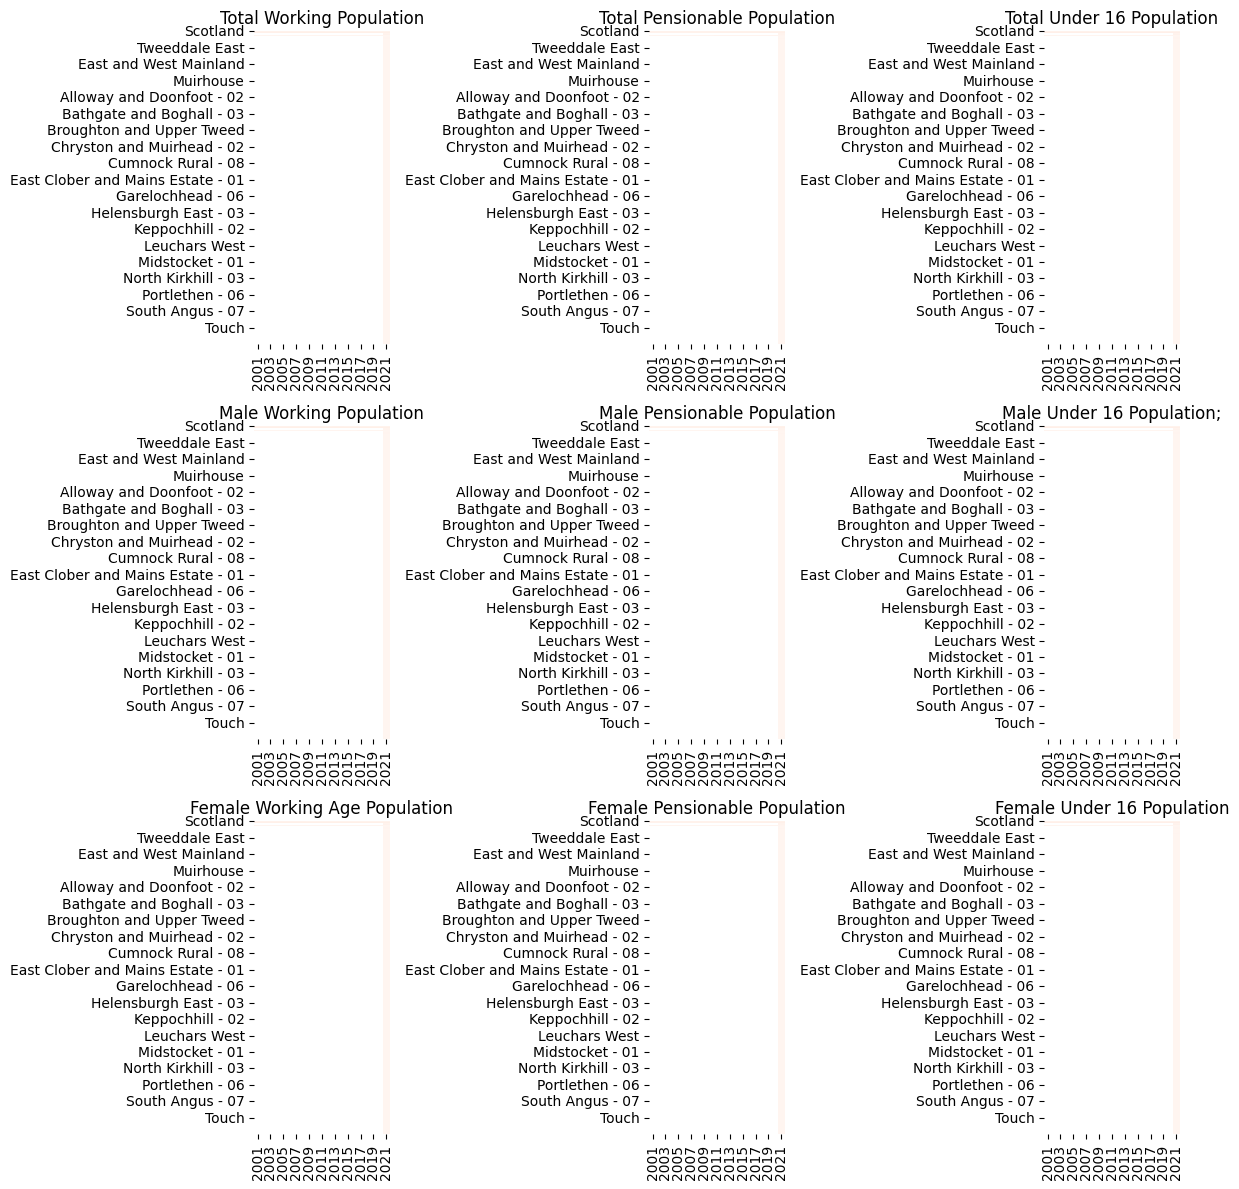

In [8]:
data_list = [total_working_age_raw_df, total_pension_raw_df, total_under_16_raw_df, male_working_age_df, male_pension_raw_df, male_under_16_raw_df, female_working_age_raw_df,
female_pension_raw_df, female_under_16_raw_df]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

axes = axes.flatten()

titles = ['Total Working Population', 'Total Pensionable Population', 'Total Under 16 Population', 'Male Working Population',
          'Male Pensionable Population', 'Male Under 16 Population;', 'Female Working Age Population', 'Female Pensionable Population',
          'Female Under 16 Population']

for i, ax in enumerate(axes):
    sns.heatmap(data_list[i], ax=ax, cmap='Reds', cbar=False)
    ax.set_title(titles[i])
    ax.set_ylabel(None)

plt.tight_layout()

plt.show()

The heatmaps above show empty data columns in years 2001 - 2021 in regions that are not the main council areas. Also Scotland data is shown to be a part of this dataset, which is not ideal for best results. The next step will involve working with cleaned and selected data, and not the entire dataset as represented above.

# Heatmap for population statistics for all age cohorts
#### The heatmaps in this section show the population of all age cohorts for males, females and the entire population. A color bar has also been added to aid visual interpretation.

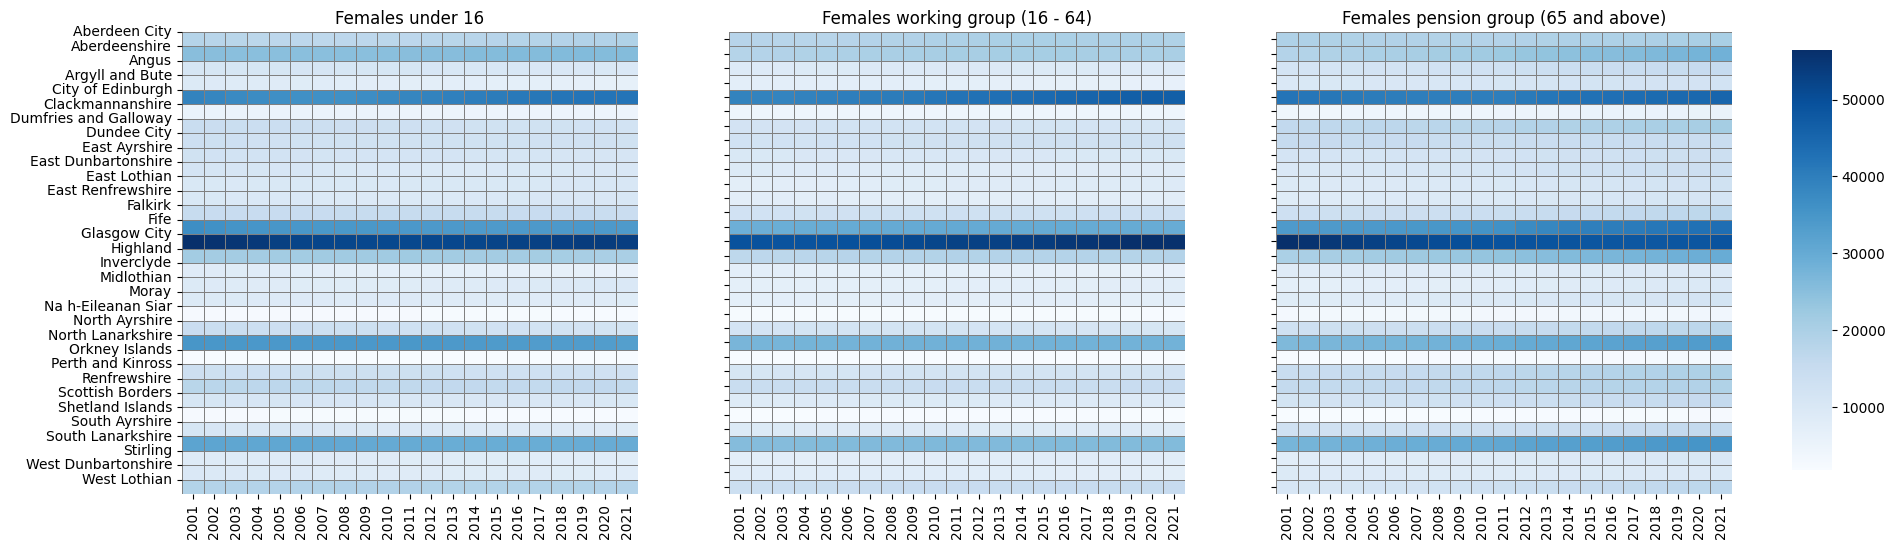

In [9]:
# Create Subplots
num_subplots_females = 3  # Number of subplots to create
fig, axes = plt.subplots(1, num_subplots_females, figsize=(20, 6))

# Plot Heatmaps for Each Age Group (Select first num_subplots age groups)
for i, age_group in enumerate(list(age_group_labels.keys())[:num_subplots_females]):
    if i == 0:
        # For the first subplot (i=0) of each age group, set y-axis tick labels as city names
        sns.heatmap(dataframes[age_group], cmap='Blues', linewidths=0.5, linecolor='gray', cbar=i == num_subplots_females - 1, cbar_ax=None if i < num_subplots_females - 1 else fig.add_axes([0.93, 0.15, 0.02, 0.7]), ax=axes[i])
        axes[i].set_ylabel('City')  # Set y-axis label for the first subplot (i=0)
        axes[i].set_yticks(range(len(dataframes[age_group].index)))
        axes[i].set_yticklabels(dataframes[age_group].index, rotation=0)  # Set y-axis tick labels
    else:
        # For other subplots, set y-axis tick labels as empty
        sns.heatmap(dataframes[age_group], cmap='Blues', linewidths=0.5, linecolor='gray', cbar=i == num_subplots_females - 1, cbar_ax=None if i < num_subplots_females - 1 else fig.add_axes([0.93, 0.15, 0.02, 0.7]), ax=axes[i])
        axes[i].set_yticklabels([])  # Set empty y-axis tick labels

    axes[i].set_title(age_group_labels[age_group])
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)

plt.show()

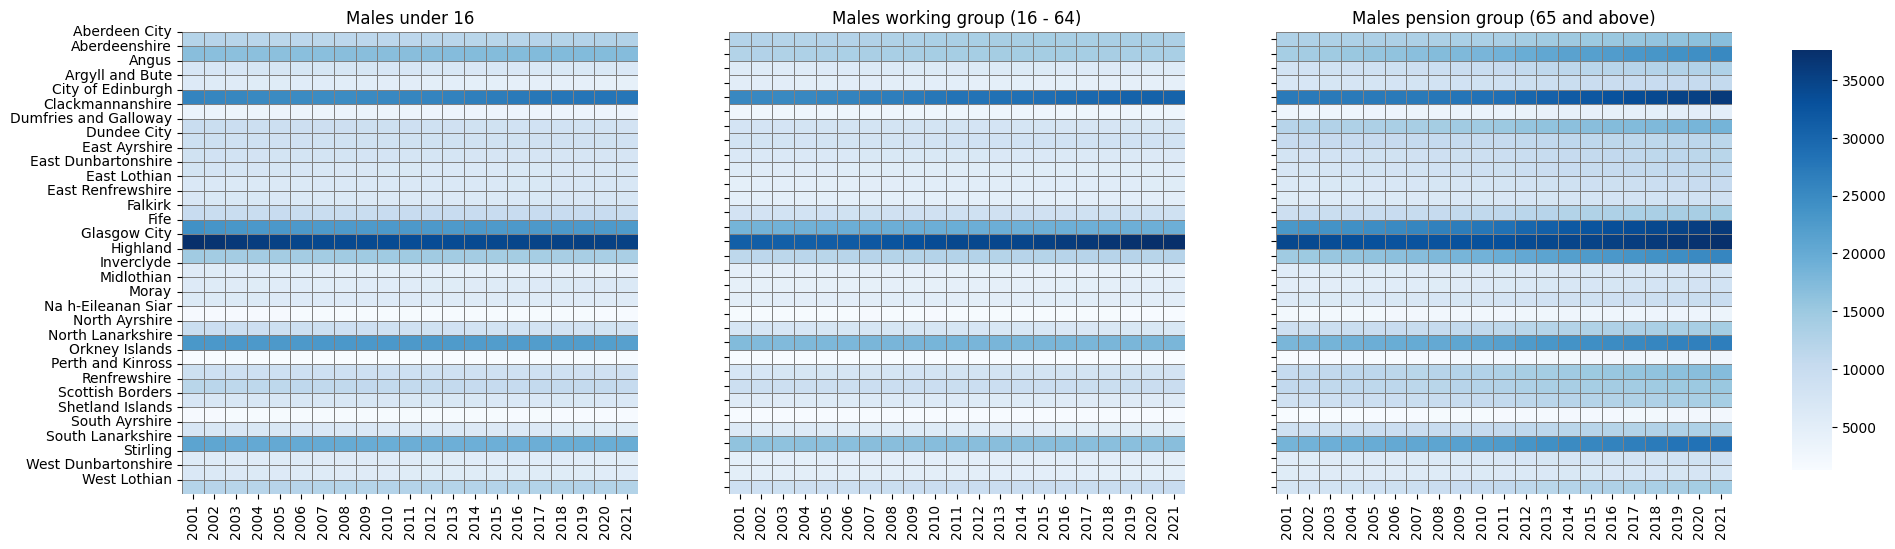

In [10]:
num_subplots_males = 3  # Number of subplots to create for males
fig, axes = plt.subplots(1, num_subplots_males, figsize=(20, 6))

# Plot Heatmaps for Each male age group
for i, age_group in enumerate(list(age_group_labels.keys())[num_subplots_females:num_subplots_females+num_subplots_males]):
    if i == 0:
        # For the first subplot (i=0), set y-axis tick labels as city names
        sns.heatmap(dataframes[age_group], cmap='Blues', linewidths=0.5, linecolor='gray', cbar=i == num_subplots_males - 1, cbar_ax=None if i < num_subplots_males - 1 else fig.add_axes([0.93, 0.15, 0.02, 0.7]), ax=axes[i])
        axes[i].set_ylabel('City')  # Set y-axis label for the first subplot (i=0)
        axes[i].set_yticks(range(len(dataframes[age_group].index)))
        axes[i].set_yticklabels(dataframes[age_group].index, rotation=0)  # Set y-axis tick labels
    else:
        # For other subplots, set y-axis tick labels as empty
        sns.heatmap(dataframes[age_group], cmap='Blues', linewidths=0.5, linecolor='gray', cbar=i == num_subplots_males - 1, cbar_ax=None if i < num_subplots_males - 1 else fig.add_axes([0.93, 0.15, 0.02, 0.7]), ax=axes[i])
        axes[i].set_yticklabels([])  # Set empty y-axis tick labels

    axes[i].set_title(age_group_labels[age_group])
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)

plt.show()

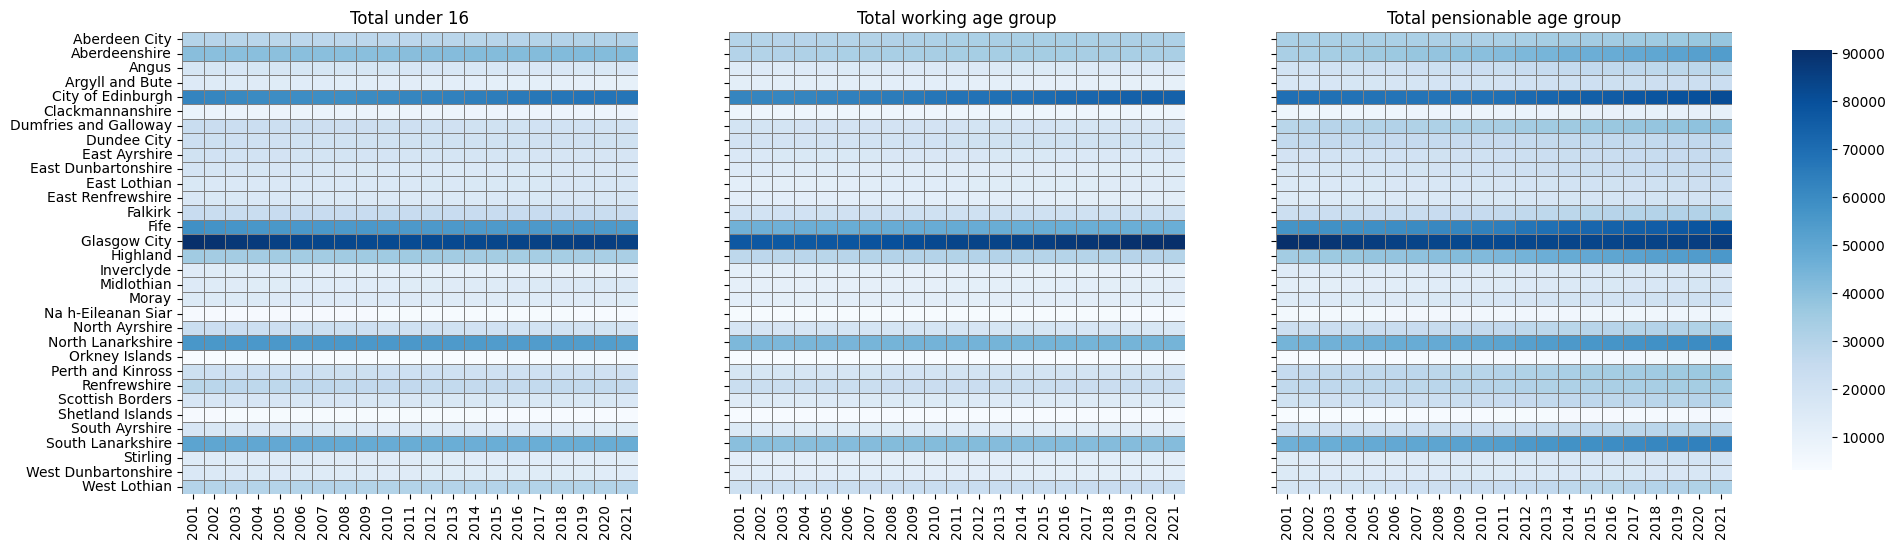

In [11]:
num_subplots_total = 3  # Number of subplots to create for total
fig, axes = plt.subplots(1, num_subplots_total, figsize=(20, 6))

# Plot Heatmaps for total
for i, age_group in enumerate(list(age_group_labels.keys())[num_subplots_females + num_subplots_males:num_subplots_females+num_subplots_males+num_subplots_total]):
    if i == 0:
        # For the first subplot, set y-axis tick labels as city names
        sns.heatmap(dataframes[age_group], cmap='Blues', linewidths=0.5, linecolor='gray', cbar=i == num_subplots_total - 1, cbar_ax=None if i < num_subplots_total - 1 else fig.add_axes([0.93, 0.15, 0.02, 0.7]), ax=axes[i])
        axes[i].set_yticklabels(dataframes[age_group].index, rotation=0)  # Set y-axis tick labels
    else:
        # For other subplots, set y-axis tick labels as empty
        sns.heatmap(dataframes[age_group], cmap='Blues', linewidths=0.5, linecolor='gray', cbar=i == num_subplots_total - 1, cbar_ax=None if i < num_subplots_total - 1 else fig.add_axes([0.93, 0.15, 0.02, 0.7]), ax=axes[i])
        axes[i].set_yticklabels([])  # Set empty y-axis tick labels

    axes[i].set_title(age_group_labels[age_group])
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)

plt.show()

# Visual representation of different geographical areas and cohorts within Scotland

In [12]:
# Function to format tick labels as "1k" (thousands)
def format_thousands(x, pos):
    return f'{x/1000:.0f}k'

# Function to plot population for a specific year in males' data
def plot_population_male(year_or_mean):
    if year_or_mean == "Mean":
        # Calculate the mean population for each age group across all years
        mean_population = pd.DataFrame()
        for age_group in list(age_group_labels.keys())[num_subplots_females:num_subplots_females + num_subplots_males]:
            mean_population[age_group_labels[age_group]] = dataframes[age_group].mean(axis=1)

        # Create Subplots for males
        fig, axes = plt.subplots(1, num_subplots_males, figsize=(18, 6))

        # Plot mean population data for each male age group in a subplot
        for i, age_group in enumerate(list(age_group_labels.keys())[num_subplots_females:num_subplots_females + num_subplots_males]):
            data_for_mean = mean_population[age_group_labels[age_group]].copy()
            data_for_mean.sort_values(ascending=False, inplace=True)

            axes[i].barh(data_for_mean.index, data_for_mean)
            axes[i].set_xlabel('Mean Population')
            axes[i].set_ylabel('City')
            axes[i].set_title(f'Mean Population- {age_group_labels[age_group]}')
            axes[i].invert_yaxis()

            # Format tick labels as "1k" (thousands)
            axes[i].xaxis.set_major_formatter(FuncFormatter(format_thousands))

        plt.tight_layout()
        plt.show()
    else:
        # Create Subplots for males
        fig, axes = plt.subplots(1, num_subplots_males, figsize=(18, 6))

        # Plot population data for each male age group in a subplot for the selected year
        for i, age_group in enumerate(list(age_group_labels.keys())[num_subplots_females:num_subplots_females + num_subplots_males]):
            data_for_year = dataframes[age_group][[year_or_mean]].copy()
            data_for_year.sort_values(by=year_or_mean, ascending=False, inplace=True)

            axes[i].barh(data_for_year.index, data_for_year[year_or_mean])
            axes[i].set_xlabel('Population')
            axes[i].set_ylabel('City')
            axes[i].set_title(f'Population {year_or_mean}- {age_group_labels[age_group]}')
            axes[i].invert_yaxis()

            # Format tick labels as "1k" (thousands)
            axes[i].xaxis.set_major_formatter(FuncFormatter(format_thousands))


        plt.tight_layout()
        plt.show()

# Get a list of years from the DataFrame columns (assuming all dataframes have the same years)
years = dataframes['male_under_16'].columns.tolist()

# Add "Mean" as an extra option to the dropdown
years.append("Mean")

# Create a Dropdown widget for year selection
year_dropdown = Dropdown(options=years, description='Select Year or Mean:')

# Interactively plot population based on selected year or mean for males' data
interact(plot_population_male, year_or_mean=year_dropdown)

interactive(children=(Dropdown(description='Select Year or Mean:', options=('2001', '2002', '2003', '2004', '2…

<function __main__.plot_population_male(year_or_mean)>

##### The above features an interactive plot of population of males across all age cohorts, between the years 2001 and 2021, as well as the mean population over these years. The following interactive bar charts demonstrate the same, but for Females and the entire population respectively.

In [13]:
# Function to format tick labels as "1k" (thousands)
def format_thousands(x, pos):
    return f'{x/1000:.0f}k'

# Function to plot population for a specific year in females' data
def plot_population_female(year_or_mean):
    if year_or_mean == "Mean":
        # Calculate the mean population for each age group across all years
        mean_population = pd.DataFrame()
        for age_group in list(age_group_labels.keys())[:num_subplots_females]:
            mean_population[age_group_labels[age_group]] = dataframes[age_group].mean(axis=1)

        # Create Subplots for females
        fig, axes = plt.subplots(1, num_subplots_females, figsize=(18, 6))

        # Plot mean population data for each female age group in a subplot
        for i, age_group in enumerate(list(age_group_labels.keys())[:num_subplots_females]):
            data_for_mean = mean_population[age_group_labels[age_group]].copy()
            data_for_mean.sort_values(ascending=False, inplace=True)

            axes[i].barh(data_for_mean.index, data_for_mean)
            axes[i].set_xlabel('Mean Population')
            axes[i].set_ylabel('City')
            axes[i].set_title(f'Mean Population- {age_group_labels[age_group]}')
            axes[i].invert_yaxis()

            # Format tick labels as "1k" (thousands)
            axes[i].xaxis.set_major_formatter(FuncFormatter(format_thousands))

        plt.tight_layout()
        plt.show()
    else:
        # Create Subplots for females
        fig, axes = plt.subplots(1, num_subplots_males, figsize=(18, 6))

        # Plot population data for each female age group in a subplot for the selected year
        for i, age_group in enumerate(list(age_group_labels.keys())[:num_subplots_females]):
            data_for_year = dataframes[age_group][[year_or_mean]].copy()
            data_for_year.sort_values(by=year_or_mean, ascending=False, inplace=True)

            axes[i].barh(data_for_year.index, data_for_year[year_or_mean])
            axes[i].set_xlabel('Population')
            axes[i].set_ylabel('City')
            axes[i].set_title(f'Population {year_or_mean}- {age_group_labels[age_group]}')
            axes[i].invert_yaxis()

            # Format tick labels as "1k" (thousands)
            axes[i].xaxis.set_major_formatter(FuncFormatter(format_thousands))


        plt.tight_layout()
        plt.show()

# Get a list of years from the DataFrame columns (assuming all dataframes have the same years)
years = dataframes['female_under_16'].columns.tolist()

# Add "Mean" as an extra option to the dropdown
years.append("Mean")

# Create a Dropdown widget for year selection
year_dropdown = Dropdown(options=years, description='Select Year or Mean:')

# Interactively plot population based on selected year or mean for females' data
interact(plot_population_female, year_or_mean=year_dropdown)

interactive(children=(Dropdown(description='Select Year or Mean:', options=('2001', '2002', '2003', '2004', '2…

<function __main__.plot_population_female(year_or_mean)>

In [14]:
# Function to format tick labels as "1k" (thousands)
def format_thousands(x, pos):
    return f'{x/1000:.0f}k'

# Function to plot population for a specific year in total' data
def plot_population_total(year_or_mean):
    if year_or_mean == "Mean":
        # Calculate the mean population for each age group across all years
        mean_population = pd.DataFrame()
        for age_group in list(age_group_labels.keys())[num_subplots_females+num_subplots_males:]:
            mean_population[age_group_labels[age_group]] = dataframes[age_group].mean(axis=1)

        # Create Subplots for total population
        fig, axes = plt.subplots(1, num_subplots_total, figsize=(18, 6))

        # Plot mean population data for each age group in a subplot
        for i, age_group in enumerate(list(age_group_labels.keys())[num_subplots_females+num_subplots_males:]):
            data_for_mean = mean_population[age_group_labels[age_group]].copy()
            data_for_mean.sort_values(ascending=False, inplace=True)

            axes[i].barh(data_for_mean.index, data_for_mean)
            axes[i].set_xlabel('Mean Population')
            axes[i].set_ylabel('City')
            axes[i].set_title(f'Mean Population- {age_group_labels[age_group]}')
            axes[i].invert_yaxis()

            # Format tick labels as "1k" (thousands)
            axes[i].xaxis.set_major_formatter(FuncFormatter(format_thousands))

        plt.tight_layout()
        plt.show()
    else:
        # Create Subplots for Total
        fig, axes = plt.subplots(1, num_subplots_males, figsize=(18, 6))

        # Plot population data for each age group in a subplot for the selected year
        for i, age_group in enumerate(list(age_group_labels.keys())[num_subplots_females+num_subplots_males:]):
            data_for_year = dataframes[age_group][[year_or_mean]].copy()
            data_for_year.sort_values(by=year_or_mean, ascending=False, inplace=True)

            axes[i].barh(data_for_year.index, data_for_year[year_or_mean])
            axes[i].set_xlabel('Population')
            axes[i].set_ylabel('City')
            axes[i].set_title(f'Population {year_or_mean}- {age_group_labels[age_group]}')
            axes[i].invert_yaxis()

            # Format tick labels as "1k" (thousands)
            axes[i].xaxis.set_major_formatter(FuncFormatter(format_thousands))


        plt.tight_layout()
        plt.show()

# Get a list of years from the DataFrame columns (assuming all dataframes have the same years)
years = dataframes['total_under_16'].columns.tolist()

# Add "Mean" as an extra option to the dropdown
years.append("Mean")

# Create a Dropdown widget for year selection
year_dropdown = Dropdown(options=years, description='Select Year or Mean:')

# Interactively plot population based on selected year or mean for total' data
interact(plot_population_total, year_or_mean=year_dropdown)

interactive(children=(Dropdown(description='Select Year or Mean:', options=('2001', '2002', '2003', '2004', '2…

<function __main__.plot_population_total(year_or_mean)>

# Visual representation of diverse socioeconomic and health indicators across different regions of Scotland

In [15]:
SIMD_df = pd.read_excel(SIMD_2020_data_path, sheet_name='Data', na_values=' ')

selected_columns = ['Council_area', 'Employment_count', 'DEPRESS', 'Income_count']
SIMD_df_selected = SIMD_df[selected_columns]

In [16]:
SIMD_df_selected.head()

,Council_area,Employment_count,DEPRESS,Income_count
0,Aberdeen City,49,0.13155,71
1,Aberdeen City,25,0.142503,43
2,Aberdeen City,19,0.128125,40
3,Aberdeen City,26,0.163964,52
4,Aberdeen City,32,0.220566,68


In [17]:
SIMD_df_selected_copy = SIMD_df_selected.copy()

# Grouping by "council area" and aggregating using sum for "employment" and "income", and using mean for "depression"

SIMD_df_selected_copy['Employment_count'] = pd.to_numeric( SIMD_df_selected_copy['Employment_count'], errors='coerce', )
SIMD_df_selected_copy['Income_count'] = pd.to_numeric( SIMD_df_selected_copy['Income_count'], errors='coerce')
SIMD_df_selected_copy['DEPRESS'] = pd.to_numeric( SIMD_df_selected_copy['DEPRESS'], errors='coerce')

# Handling missing values by filling them with zeros
SIMD_df_selected_copy['Employment_count'].fillna(0, inplace=True)
SIMD_df_selected_copy['Income_count'].fillna(0, inplace=True)
SIMD_df_selected_copy['DEPRESS'].fillna(0, inplace=True)


grouped_SIMD = SIMD_df_selected_copy.groupby('Council_area').agg({
    'Employment_count': 'sum',
    'DEPRESS': 'mean',
    'Income_count': 'sum'
}).reset_index() ## setting the index back to the previous state

# Renaming the columns
grouped_SIMD.columns = ['Council_area', 'Employment_deprived_population', 'Mean_depression', 'Income_deprived_population']

In [18]:
grouped_SIMD.head()

,Council_area,Employment_deprived_population,Mean_depression,Income_deprived_population
0,Aberdeen City,11244,0.158577,19610
1,Aberdeenshire,8602,0.155934,16531
2,Angus,5799,0.190865,11744
3,Argyll and Bute,4065,0.188115,8450
4,City of Edinburgh,23550,0.152870,44581


In [19]:
fig = px.scatter(data_frame=grouped_SIMD,
                 x='Employment_deprived_population',
                 y='Mean_depression',
                 size='Income_deprived_population',
                 color='Council_area', ##certain colour differenciate the data by council area... It takes the coucil areas ..it uses a random set of clours assigned to a council areas
                 title='Income/Employment Deprivation and Depression Rate across Different Regions of Scotland',
                 log_x=True, ##set x it will be displayed on a logrithum scale
                 labels={'Mean_depression': 'Depression Rate'},
                 hover_name='Council_area',
                 height=600,
                 size_max=100)

fig.show()

##### The bubble chart above, shows the relationship between employment deprived population count and percentage depression rate, as well as income deprived population count, across 32 council areas in Scotland. The size of the individual bubbles represent the income deprived population of the respective council areas, with larger sizes corresponding to higher income deprivation count, and vice-versa. Council areas have been seperated by color, and all three metrics can be accessed for individual cities simply by hovering on the corresponding bubble.

# Correlation between deprivation levels in Scottish Council and different age cohorts


In [20]:
age_division_df = pd.read_csv(year_2020_data_path, na_values=' ', nrows=33)
age_division_df = age_division_df.iloc[1:33, :]

age_division_df.columns = ['City',
                           'All',
                          'Children',
                          'Working Age',
                          'Pensionable Age']
age_division_df.head()

,City,All,Children,Working Age,Pensionable Age
1,Aberdeen City,229060,35789,156660,36611
2,Aberdeenshire,260780,48674,160000,52106
3,Angus,115820,18908,68871,28041
4,Argyll and Bute,85430,12577,50511,22342
5,City of Edinburgh,527620,79150,368491,79979


In [21]:
deprivation_df = pd.read_excel(SIMD_2020_data_path, sheet_name='Data', na_values=' ')

selected_columns = ['Council_area', 'Employment_count', 'DEPRESS', 'Income_count', 'crime_count', 'overcrowded_count', ]
deprivation_df_selected = deprivation_df[selected_columns]

deprivation_df_selected.head()

,Council_area,Employment_count,DEPRESS,Income_count,crime_count,overcrowded_count
0,Aberdeen City,49,0.13155,71,11.139188,87
1,Aberdeen City,25,0.142503,43,10.126535,85
2,Aberdeen City,19,0.128125,40,8.101228,31
3,Aberdeen City,26,0.163964,52,4.050614,42
4,Aberdeen City,32,0.220566,68,11.139188,50


In [22]:
deprivation_df_selected_copy = deprivation_df_selected.copy()

# Grouping by "council area" and aggregating using sum for "employment", "income", "crime", and "overcrowded count", and using mean for "depression"

deprivation_df_selected_copy['Employment_count'] = pd.to_numeric( deprivation_df_selected_copy['Employment_count'], errors='coerce', )
deprivation_df_selected_copy['Income_count'] = pd.to_numeric( deprivation_df_selected_copy['Income_count'], errors='coerce')
deprivation_df_selected_copy['crime_count'] = pd.to_numeric( deprivation_df_selected_copy['crime_count'], errors='coerce')
deprivation_df_selected_copy['overcrowded_count'] = pd.to_numeric( deprivation_df_selected_copy['overcrowded_count'], errors='coerce')
deprivation_df_selected_copy['DEPRESS'] = pd.to_numeric( deprivation_df_selected_copy['DEPRESS'], errors='coerce')

# Handling missing values by filling them with zeros
deprivation_df_selected_copy['Employment_count'].fillna(0, inplace=True)
deprivation_df_selected_copy['Income_count'].fillna(0, inplace=True)
deprivation_df_selected_copy['crime_count'].fillna(0, inplace=True)
deprivation_df_selected_copy['overcrowded_count'].fillna(0, inplace=True)
deprivation_df_selected_copy['DEPRESS'].fillna(0, inplace=True)


grouped_deprivation = deprivation_df_selected_copy.groupby('Council_area').agg({
    'Employment_count': 'sum',
    'DEPRESS': 'mean',
    'Income_count': 'sum',
    'crime_count': 'sum',
    'overcrowded_count': 'sum'
}).reset_index()

# Renaming the columns
grouped_deprivation.columns = ['Council Area',
                               'Employment Deprived',
                               'Mean Depression',
                               'Income Deprived',
                               'Recorded Crime',
                              'Overcrowded']


grouped_deprivation.head()

,Council Area,Employment Deprived,Mean Depression,Income Deprived,Recorded Crime,Overcrowded
0,Aberdeen City,11244,0.158577,19610,8063.759584,29077
1,Aberdeenshire,8602,0.155934,16531,4511.064206,14843
2,Angus,5799,0.190865,11744,2668.367541,8791
3,Argyll and Bute,4065,0.188115,8450,1665.760216,6609
4,City of Edinburgh,23550,0.152870,44581,17759.791189,68067


In [23]:
correlation_df = pd.merge(age_division_df,grouped_deprivation, how='inner', left_on= 'City', right_on='Council Area')
correlation_df.drop(columns=['Council Area'], inplace=True) ## the change is done directly to the dataframe
correlation_df

,City,All,Children,Working Age,Pensionable Age,Employment Deprived,Mean Depression,Income Deprived,Recorded Crime,Overcrowded
0,Aberdeen City,229060,35789,156660,36611,11244,0.158577,19610,8063.759584,29077
1,Aberdeenshire,260780,48674,160000,52106,8602,0.155934,16531,4511.064206,14843
2,Angus,115820,18908,68871,28041,5799,0.190865,11744,2668.367541,8791
3,Argyll and Bute,85430,12577,50511,22342,4065,0.188115,8450,1665.760216,6609
4,City of Edinburgh,527620,79150,368491,79979,23550,0.152870,44581,17759.791189,68067
5,Clackmannanshire,51290,8897,31817,10576,3706,0.219116,7305,1743.766628,4675
6,Dumfries and Galloway,148290,23050,86182,39058,7748,0.188246,17084,4411.989126,10563
7,Dundee City,148820,23958,98822,26040,12256,0.220951,24391,5713.734381,19460
8,East Ayrshire,121600,20869,75511,25220,8796,0.201233,18532,3423.897857,11456
9,East Dunbartonshire,108750,19500,64517,24733,4023,0.178145,7735,1647.897451,7477


In [24]:
import matplotlib
from matplotlib.cm import get_cmap
import scipy

age_group, deprivation_index = [
    ['All', 'Children', 'Working age', 'Pensionable age'],
    ['Employment Deprived', 'Mean Depression', 'Income Deprived', 'Recorded Crime', 'Overcrowded']
]

def format_mean_depression(x, pos):
    return f'{x*100:.0f}%'

def update_plot(age_group, deprivation_index):
    age_group_data = correlation_df[age_group]
    plt.figure(figsize=(10, 6))

    cmap = matplotlib.colormaps.get_cmap('tab20')

    # Scatter plot with logarithmic x-axis and unique colors for each city
    for i, (city, color) in enumerate(zip(correlation_df['City'], cmap.colors)):
        plt.scatter(correlation_df[age_group][i], correlation_df[deprivation_index][i], color=color, label=city)

    # Correlation line
    r_value, p_value = scipy.stats.pearsonr(correlation_df[age_group], correlation_df[deprivation_index])
    fit = np.polyfit(correlation_df[age_group], correlation_df[deprivation_index], 1)
    correlation_line = np.polyval(fit, correlation_df[age_group])
    plt.plot(correlation_df[age_group], correlation_line, color='black', linewidth=1.0)


    # Add r-value and p-value annotations
    plt.annotate(f'r = {r_value:.2f}', (0.86, 0.34), xycoords='axes fraction')
    plt.annotate(f'p = {p_value:.4f}', (0.86, 0.28), xycoords='axes fraction')


    toggle_labels = {
        'All': 'Total Population',
        'Children': 'Under 16 Population',
        'Working Age': 'Working Age Population',
        'Pensionable Age': 'Pensionable Age Population',
        'Employment Deprived': 'Employment Deprived Population',
        'Mean Depression': 'Mean Depression',
        'Income Deprived': 'Income Deprived Population',
        'Recorded Crime': 'Recorded Crime Count',
        'Overcrowded': 'Population Suffering Overcrowding'
    }


    plt.xlabel(toggle_labels[age_group])
    plt.ylabel(toggle_labels[deprivation_index])
    plt.title(f'Association of {toggle_labels[age_group]} and {toggle_labels[deprivation_index]}')

    #position legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    #format x and y axis
    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_thousands))

    if deprivation_index == 'Mean Depression':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(format_mean_depression))
    else:
        plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))


    plt.grid(True)


    plt.show()


# Creating the toggle widgets
age_group_toggle = widgets.ToggleButtons(options=correlation_df.columns[1:5],
                                         description='Age Group:',
                                         disabled=False,
                                         button_style='')

deprivation_index_toggle = widgets.ToggleButtons(options=correlation_df.columns[5:],
                                                 description='Deprivation Index:',
                                                 disabled=False,
                                                 button_style='')

# Interactively updating the plot based on the selected age group and deprivation index
interact(update_plot, age_group=age_group_toggle, deprivation_index=deprivation_index_toggle)

interactive(children=(ToggleButtons(description='Age Group:', options=('All', 'Children', 'Working Age', 'Pens…

<function __main__.update_plot(age_group, deprivation_index)>

#Seaborn Pairplot

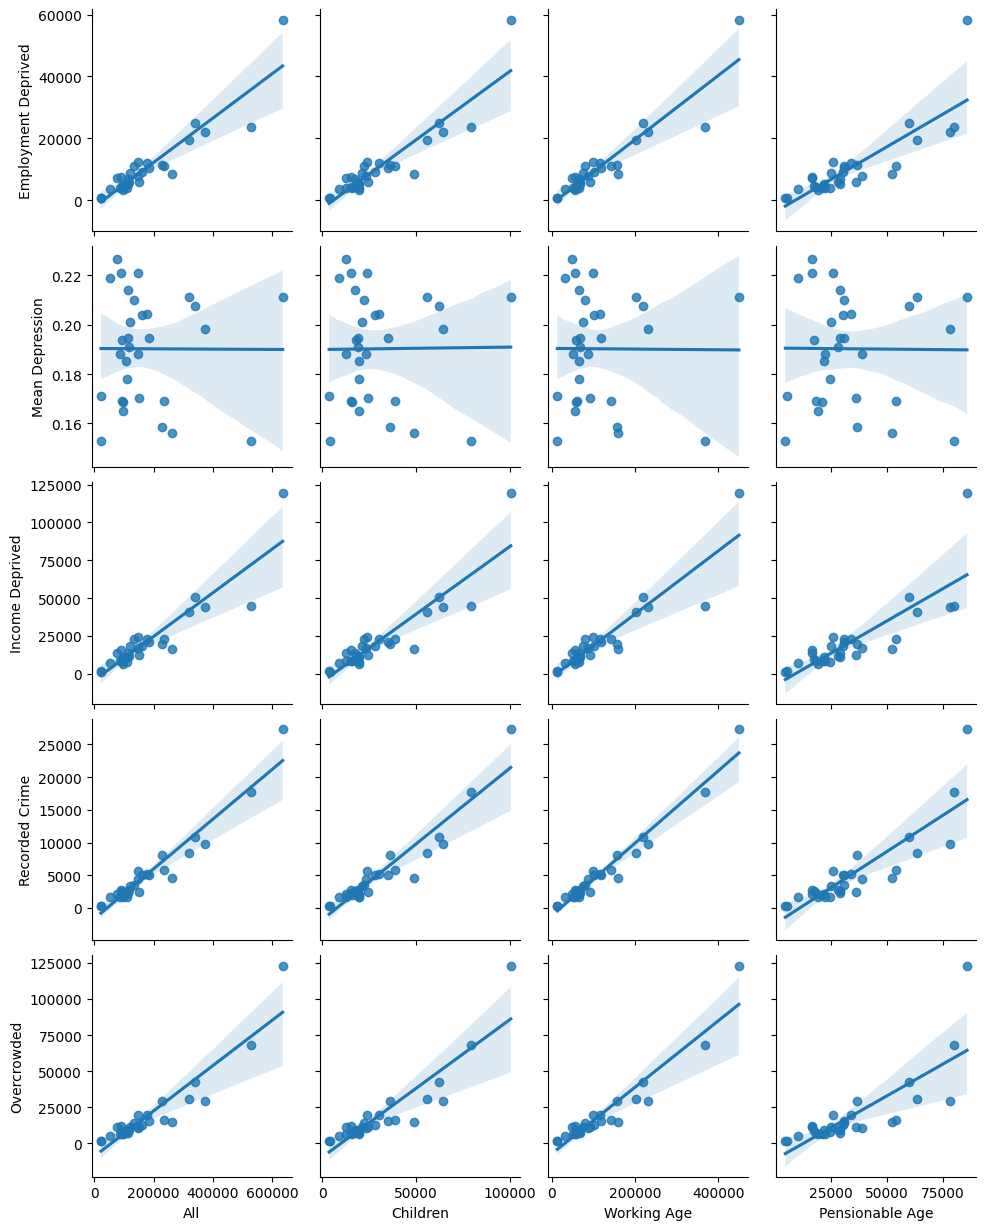

In [25]:
sns.pairplot(data=correlation_df, kind='reg', x_vars=['All',	'Children',	'Working Age',	'Pensionable Age'], y_vars=['Employment Deprived',	'Mean Depression',	'Income Deprived',	'Recorded Crime',	'Overcrowded'])

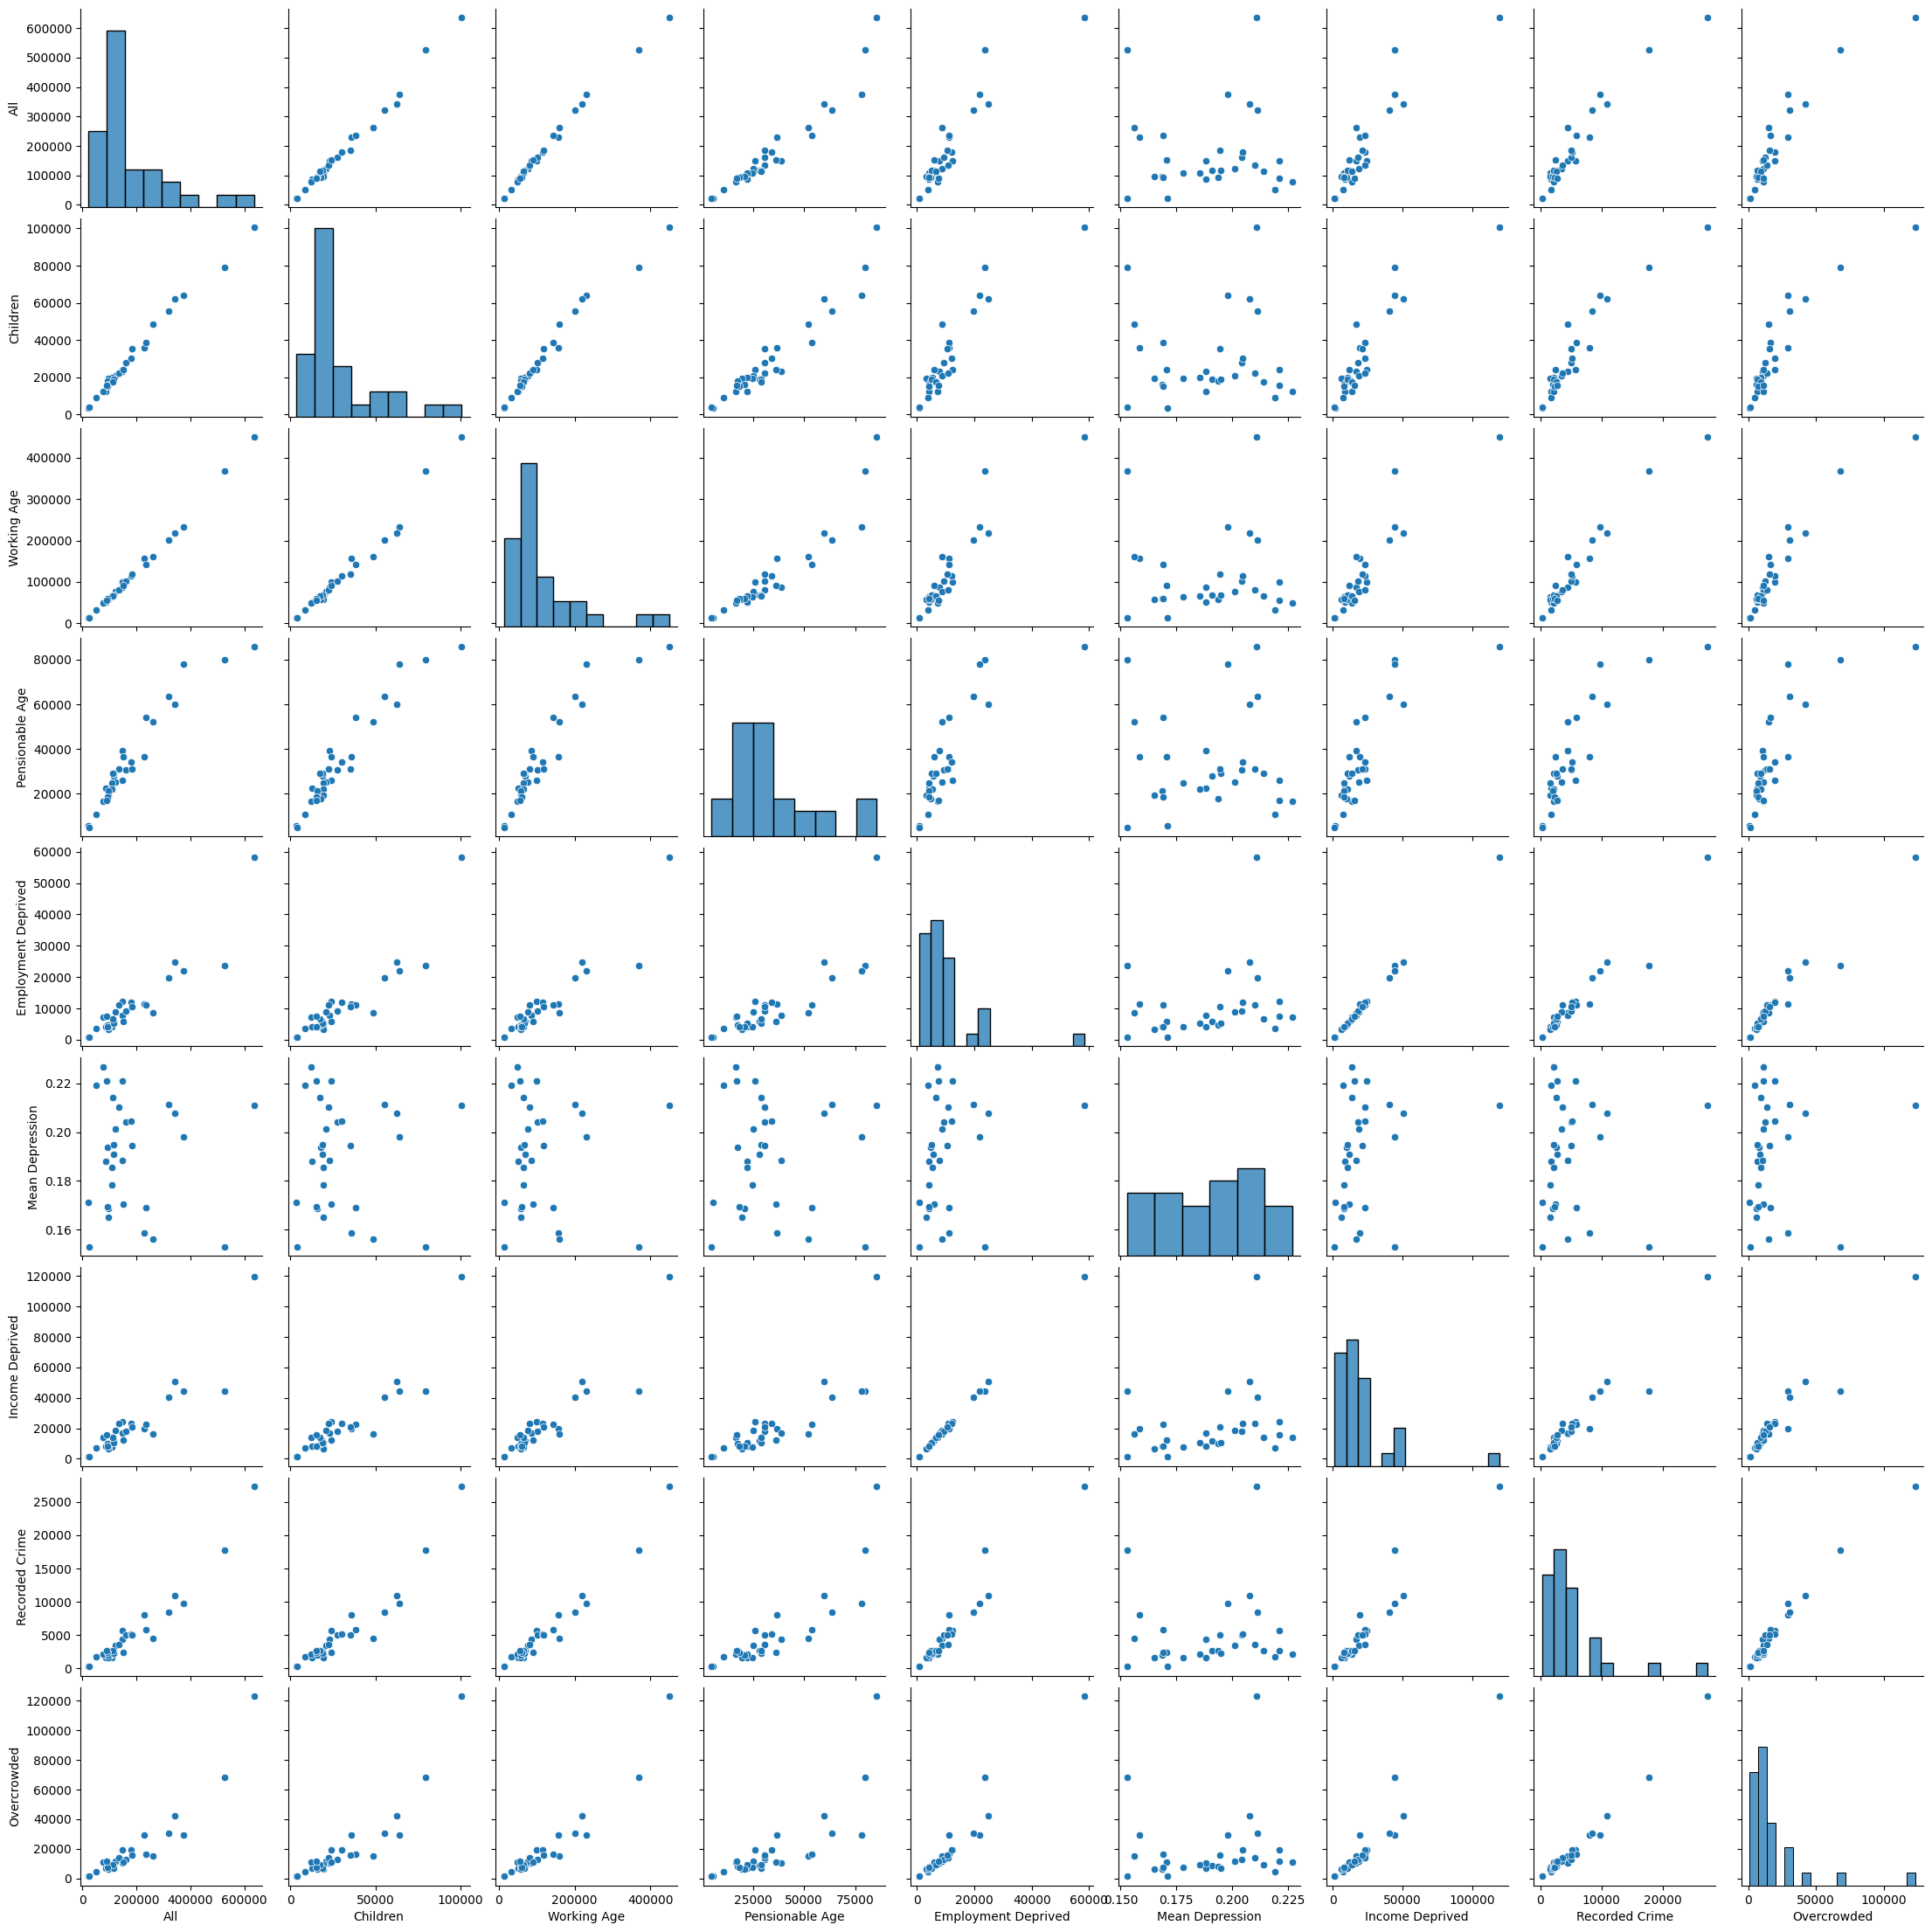

In [26]:
sns.pairplot(data=correlation_df)

#Export of Prepared deprivation/age cohort data for Maachine Learning with R

In [31]:
# Define file path on Google Drive
file_path = '/content/drive/MyDrive/corr.csv'

# Export DataFrame to CSV
correlation_df.to_csv(file_path, index=False)

# Use R within python notebooks

In [32]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


#Install Packages needed

In [ ]:
%%R

install.packages("caTools")
install.packages("caret")

#create a machine learning dataframe

In [35]:
%%R

ml_df <- read.csv('/content/drive/MyDrive/corr.csv')
colnames(ml_df) <- c("City", "Total", "Children", "Working", "Pensionable", "Unemployed", "Depression", "Incomedeprived", "Crime", 'Overcrowded')
head(ml_df)

               City  Total Children Working Pensionable Unemployed Depression
1     Aberdeen City 229060    35789  156660       36611      11244  0.1585773
2     Aberdeenshire 260780    48674  160000       52106       8602  0.1559335
3             Angus 115820    18908   68871       28041       5799  0.1908653
4   Argyll and Bute  85430    12577   50511       22342       4065  0.1881146
5 City of Edinburgh 527620    79150  368491       79979      23550  0.1528704
6  Clackmannanshire  51290     8897   31817       10576       3706  0.2191161
  Incomedeprived     Crime Overcrowded
1          19610  8063.760       29077
2          16531  4511.064       14843
3          11744  2668.368        8791
4           8450  1665.760        6609
5          44581 17759.791       68067
6           7305  1743.767        4675


#Split into test and train dataset

In [36]:
%%R

#split into training and test sets
set.seed(7)
library(caTools)
split <- sample.split(ml_df, SplitRatio=0.8)

train <- subset(ml_df, split == TRUE)
test <- subset(ml_df, split == FALSE)

model <- lm(Overcrowded ~ Total + Children + Working + Pensionable, data = train)


summary(model)


Call:
lm(formula = Overcrowded ~ Total + Children + Working + Pensionable, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15943.2  -1901.9    198.1   1979.2  13363.0 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2272.6932  2396.1991   0.948  0.35422    
Total         -0.7411     0.2092  -3.543  0.00204 ** 
Children       0.4911     0.6476   0.758  0.45712    
Working        1.1775     0.1891   6.228 4.41e-06 ***
Pensionable        NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5576 on 20 degrees of freedom
Multiple R-squared:  0.9603,	Adjusted R-squared:  0.9543 
F-statistic: 161.1 on 3 and 20 DF,  p-value: 3.576e-14



In [37]:
#prediction
%%R
pred <- predict(model, test)
pred

        1         8        11        18        21        28        31 
34554.362 20107.686  9704.323  9816.551 37964.056 29394.915 21909.538 


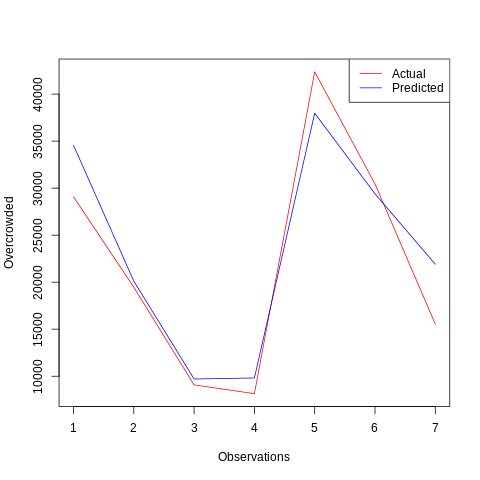

In [40]:
%%R

plot(test$Overcrowded, type = 'l', lty = 1.8, col='red', xlab = "Observations", ylab = "Overcrowded")
lines(pred, type='l', col='blue')
legend("topright", legend = c("Actual", "Predicted"), col = c("red", "blue"), lty = 1.8)